In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import re
import os
import shutil
import seaborn as sns
from scipy import stats
from ptm_dict import modres
from adjustText import adjust_text
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import mean_absolute_error as mae

In [2]:
# Block of seaborn style settings
plt.rc('font', size=23) #controls default text size
plt.rc('axes', labelsize=20) #fontsize of the x and y labels
plt.rc('xtick', labelsize=18) #fontsize of the x tick labels
plt.rc('ytick', labelsize=18) #fontsize of the y tick labels
sns.set(style='whitegrid', color_codes=True, font='serif', font_scale=2)

plt.rc('font', size=23) #controls default text size
plt.rc('xtick', labelsize=25) #fontsize of the x tick labels
plt.rc('ytick', labelsize=25) #fontsize of the y tick labels

In [3]:
skempi2 = pd.read_csv('/groups/sbinlab/panf/SKEMPIv2_benchmark/skempi2_final.csv')
skempi2_raw = pd.read_csv('/groups/sbinlab/panf/SKEMPIv2_benchmark/skempi_v2.csv', sep=';')
skempi2_avg_nb = pd.read_csv('/groups/sbinlab/panf/SKEMPIv2_benchmark/skempi2_nb.csv')

In [4]:
exp_cart_ddG_all = pd.read_csv('/groups/sbinlab/panf/SKEMPIv2_benchmark/cart_pipeline_full_struct.csv')

In [94]:
exp_cart_ddG_all_nb = pd.concat([exp_cart_ddG_all, exp_cart_ddG_nb])

In [6]:
exp_cart_ddG_all_nb = exp_cart_ddG_all.copy()
exp_cart_ddG_all_nb.loc[exp_cart_ddG_all_nb['no_proper_value']=='no binding MUT', 'dG_bind_MUT'] = -1.5
exp_cart_ddG_all_nb['ddG_bind'] = exp_cart_ddG_all_nb['dG_bind_MUT'].values - exp_cart_ddG_all_nb['dG_bind_WT'].values

exp_cart_ddG_all_no_nan = exp_cart_ddG_all.copy().dropna(subset=['ddG_bind', 'mean_ddG', 'mean_ddG_infc'])
#exp_cart_ddG_all_no_nan = exp_cart_ddG_all_no_nan.loc[exp_cart_ddG_all_no_nan['no_proper_value']=='Regular']

In [8]:
exp_cart_ddG_all_no_nan.loc[exp_cart_ddG_all_no_nan['Hold_out_type'].isna(), 'Hold_out_type'] = 'None'

In [9]:
exp_cart_ddG_all_no_nan.Hold_out_type.unique()

array(['Pr/PI', 'None', 'AB/AG', 'AB/AG,Pr/PI', 'TCR/pMHC'], dtype=object)

In [9]:
outliers = exp_cart_ddG_all_no_nan.loc[abs(exp_cart_ddG_all_no_nan['ddG_bind']-exp_cart_ddG_all_no_nan['mean_ddG_infc'])>4]

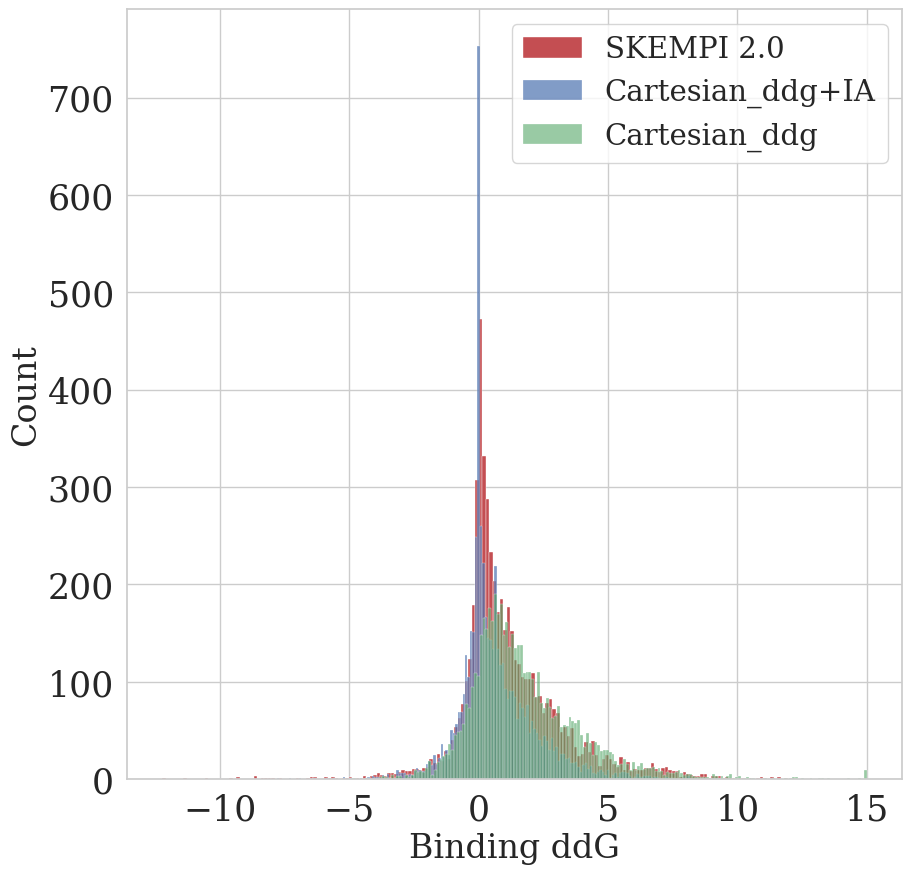

In [27]:
fig= plt.figure(figsize=(10, 10))
sns.histplot(data=exp_cart_ddG_all_no_nan, x="ddG_bind", bins=180, color='r', alpha = 1, label='SKEMPI 2.0')
sns.histplot(data=exp_cart_ddG_all_no_nan, x="mean_ddG_infc", bins=180, color='b', alpha = 0.7, label='Cartesian_ddg+IA')
sns.histplot(data=exp_cart_ddG_all_no_nan, x="mean_ddG", bins=180, color='g', alpha = 0.6, label='Cartesian_ddg')

plt.xlabel('Binding ddG')

plt.legend(fontsize=21)
plt.savefig("Figures/ddG_bind_dist_CartIA_Cart_Exp.pdf", format='pdf')

In [17]:
exp_cart_ddG_all_no_nan.Method.value_counts()

Method
SPR         2032
FL          1350
ITC          420
IASP         387
SFFL         293
RA           261
SP           190
ELISA        152
IAFL         145
KinExA       103
IARA          89
BI            49
CSPRIA        40
ELFA          25
ESMA          17
SPR,SFFL      10
SFPF          10
IAGE           8
EMSA           6
Name: count, dtype: int64

In [ ]:
list_of_lists = [['SPR', 'FL', 'ITC', 'SP'], ['RA', 'IASP', 'SFFL', 'ELISA', 'IAFL', 'KinExA'],
                 ['IARA', 'BI', 'CSPRIA', 'ELFA', 'ESMA'], ['SPR,SFFL', 'SFPF', 'IAGE', 'EMSA']]

In [48]:
list_of_lists = [['SPR', 'FL', 'ITC'], ['SP', 'SFFL'],
                 ['ELISA', 'RA'], ['KinExA', 'BI', 'CSPRIA', 'ELFA'],
                 ['IASP', 'IAFL'], ['IARA', 'IAGE']]

In [64]:
list_of_lists = [['SPR', 'FL', 'ITC'], ['ELISA', 'RA'],
                 ['SP', 'SFFL'], ['IASP', 'IAFL'],
                 ['KinExA', 'BI', 'CSPRIA', 'ELFA'], ['IARA', 'IAGE']]

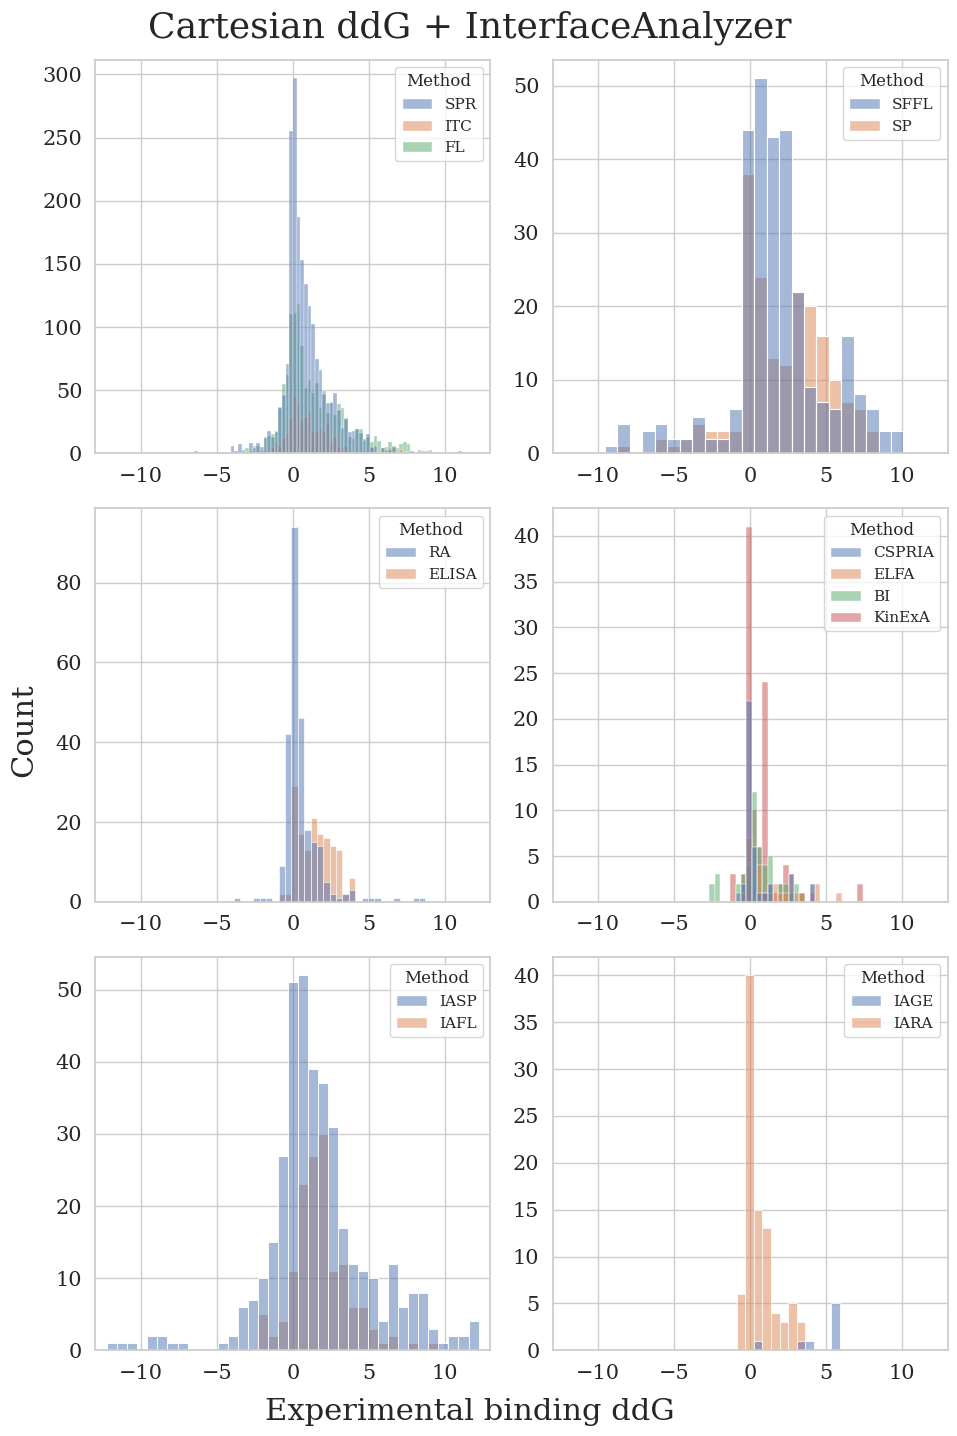

In [58]:
plt.rc('font', size=15) #controls default text size
plt.rc('xtick', labelsize=15) #fontsize of the x tick labels
plt.rc('ytick', labelsize=15) #fontsize of the y tick labels
#sns.set(style='whitegrid', color_codes=True, font='serif', font_scale=1)

fig, axes = plt.subplots(3, 2, figsize=(10, 15))
plt.setp(axes, xlim=(-13, 13))
axes = axes.flatten()
df = exp_cart_ddG_all_no_nan.copy()
for ax, l in zip(axes, list_of_lists):
    subset = df.loc[df['Method'].isin(l)]
    a = sns.histplot(data=subset, x="ddG_bind", hue='Method', ax=ax, alpha=0.5)
    #a.set_title(sub, fontsize=25)
    ax.set_xlabel('')
    ax.set_ylabel('')

fig.text(0.5, 0.04, 'Experimental binding ddG', ha='center', fontsize=22)
fig.text(0.04, 0.5, 'Count', va='center', rotation='vertical', fontsize=22)
fig.suptitle('Cartesian ddG + InterfaceAnalyzer', fontsize=26)
plt.tight_layout(rect=[0.05, 0.05, 1, 1])
plt.savefig('Figures/cart_ddG_IA_method_hist.pdf', format='pdf')

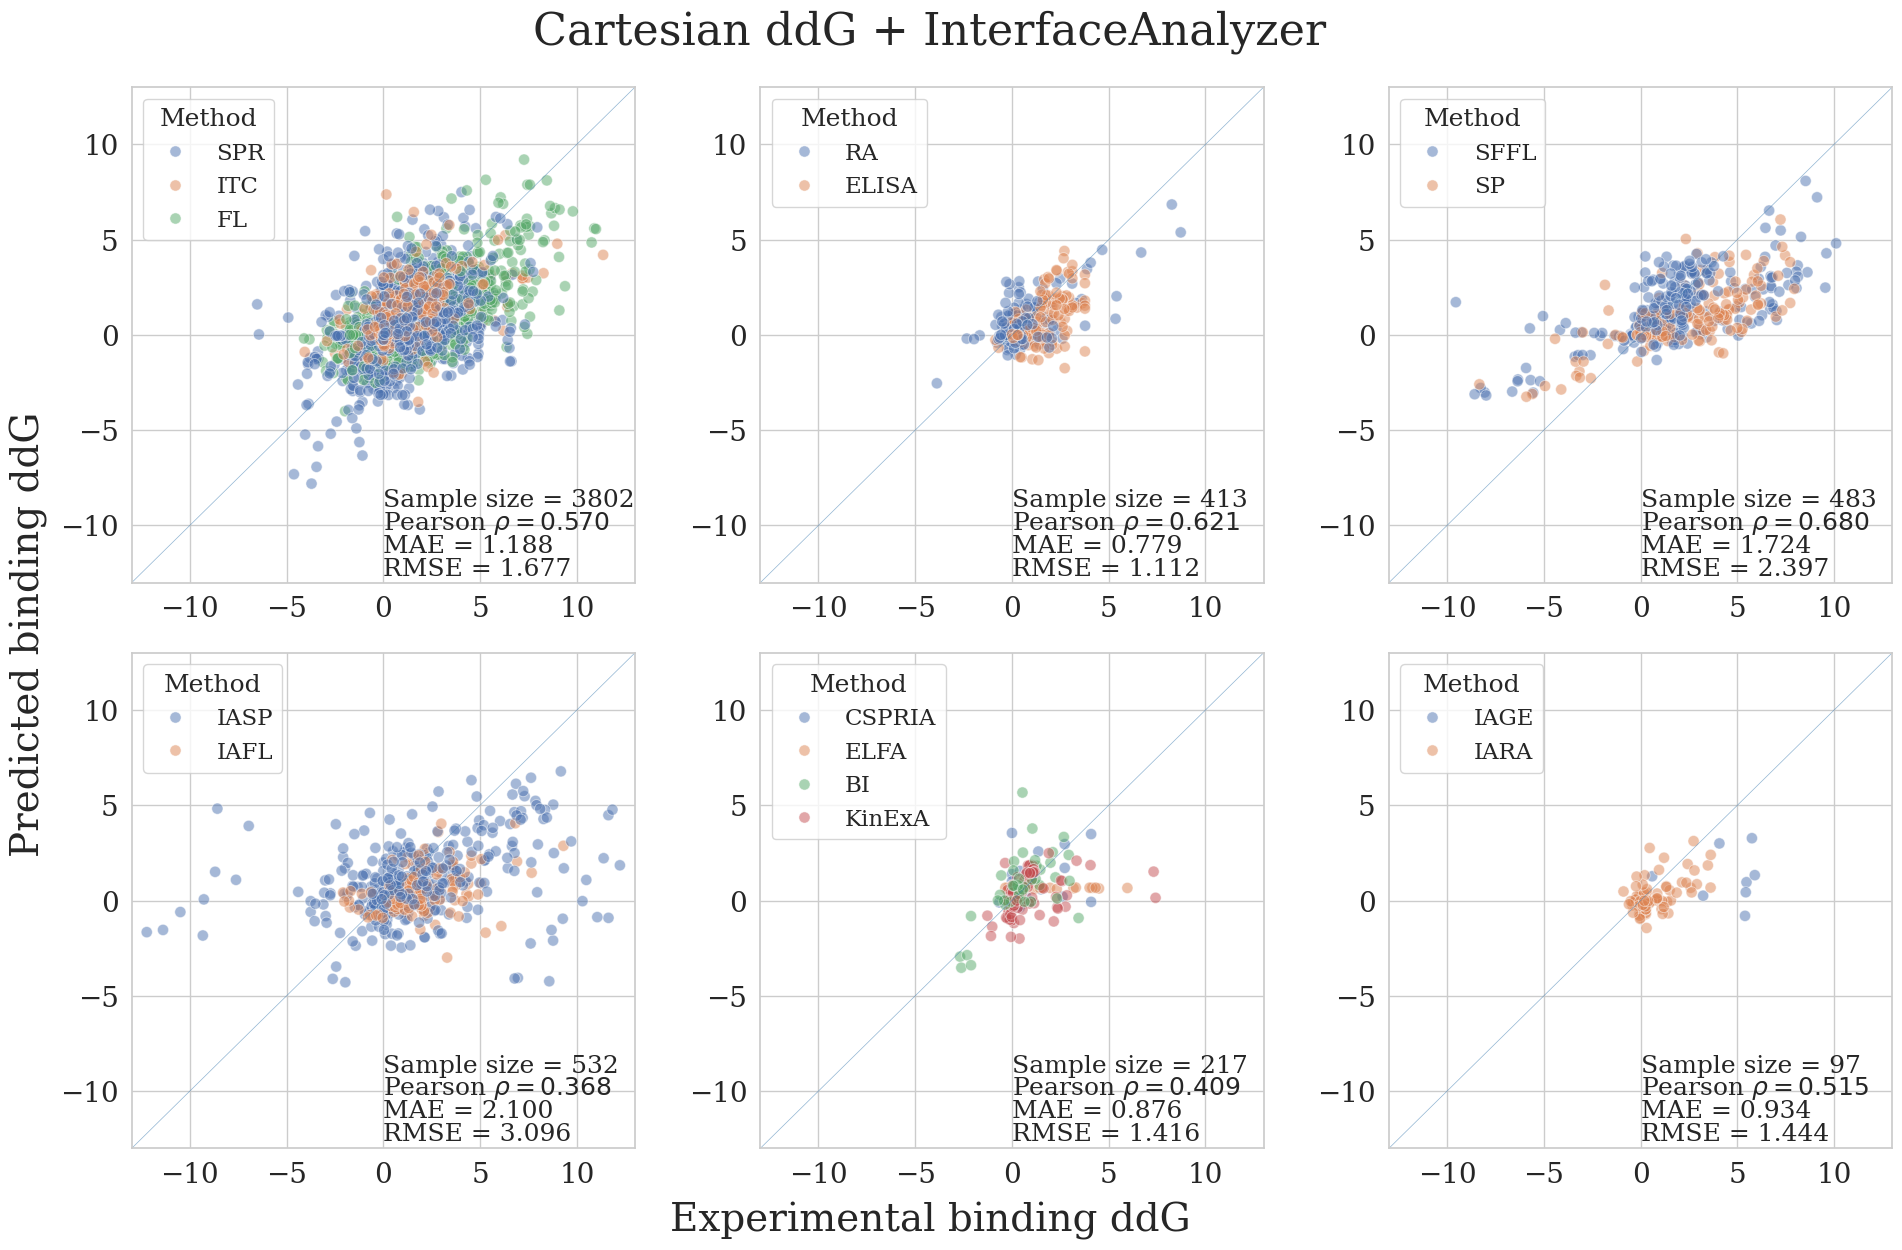

In [70]:
sns.set(style='whitegrid', color_codes=True, font='serif', font_scale=1.5)
plt.rc('font', size=20) #controls default text size
plt.rc('xtick', labelsize=20) #fontsize of the x tick labels
plt.rc('ytick', labelsize=20) #fontsize of the y tick labels


fig, axes = plt.subplots(2, 3, figsize=(20, 13))
plt.setp(axes, xlim=(-13, 13), ylim=(-13, 13))
axes = axes.flatten()

for ax, l in zip(axes, list_of_lists):
    subset = exp_cart_ddG_all_no_nan.loc[exp_cart_ddG_all_no_nan['Method'].isin(l)]
    sns.scatterplot(data=subset, x='ddG_bind',
                       y='mean_ddG_infc',
                       alpha=0.5, s=65,
                       hue='Method',
                       ax=ax)
    
    ax.plot([-15, 15], [-15, 15], color='steelblue', ls='-', lw=0.5, alpha=0.6)
    ax.annotate(f'Sample size = {len(subset)}', xy=(0, -9), fontsize = 18)
    r, p = stats.pearsonr(subset['ddG_bind'], subset['mean_ddG_infc'])
    ax.annotate(f'Pearson $\\rho = {r:.3f}$', xy=(0, -10.2), fontsize = 18)
    error = mae(subset['ddG_bind'], subset['mean_ddG_infc'])
    ax.annotate(f'MAE = {error:.3f}', xy=(0, -11.4), fontsize = 18)
    rmse = sqrt(mean_squared_error(subset['ddG_bind'], subset['mean_ddG_infc']))
    ax.annotate(f'RMSE = {rmse:.3f}', xy=(0, -12.6), fontsize = 18)
    ax.set_xlabel("")
    ax.set_ylabel("")
    #ax.set_title(f'N of point mutations = {N}', fontsize = 28)
    sns.move_legend(ax, "upper left")
    
fig.text(0.5, 0.04, 'Experimental binding ddG', ha='center', fontsize=28)  # x label
fig.text(0.04, 0.5, 'Predicted binding ddG', va='center', rotation='vertical', fontsize=28)
fig.suptitle('Cartesian ddG + InterfaceAnalyzer', fontsize=32)
plt.tight_layout(rect=[0.05, 0.05, 1, 1])
plt.savefig('Figures/cart_ddG_IA_method_x6.pdf', format='pdf')

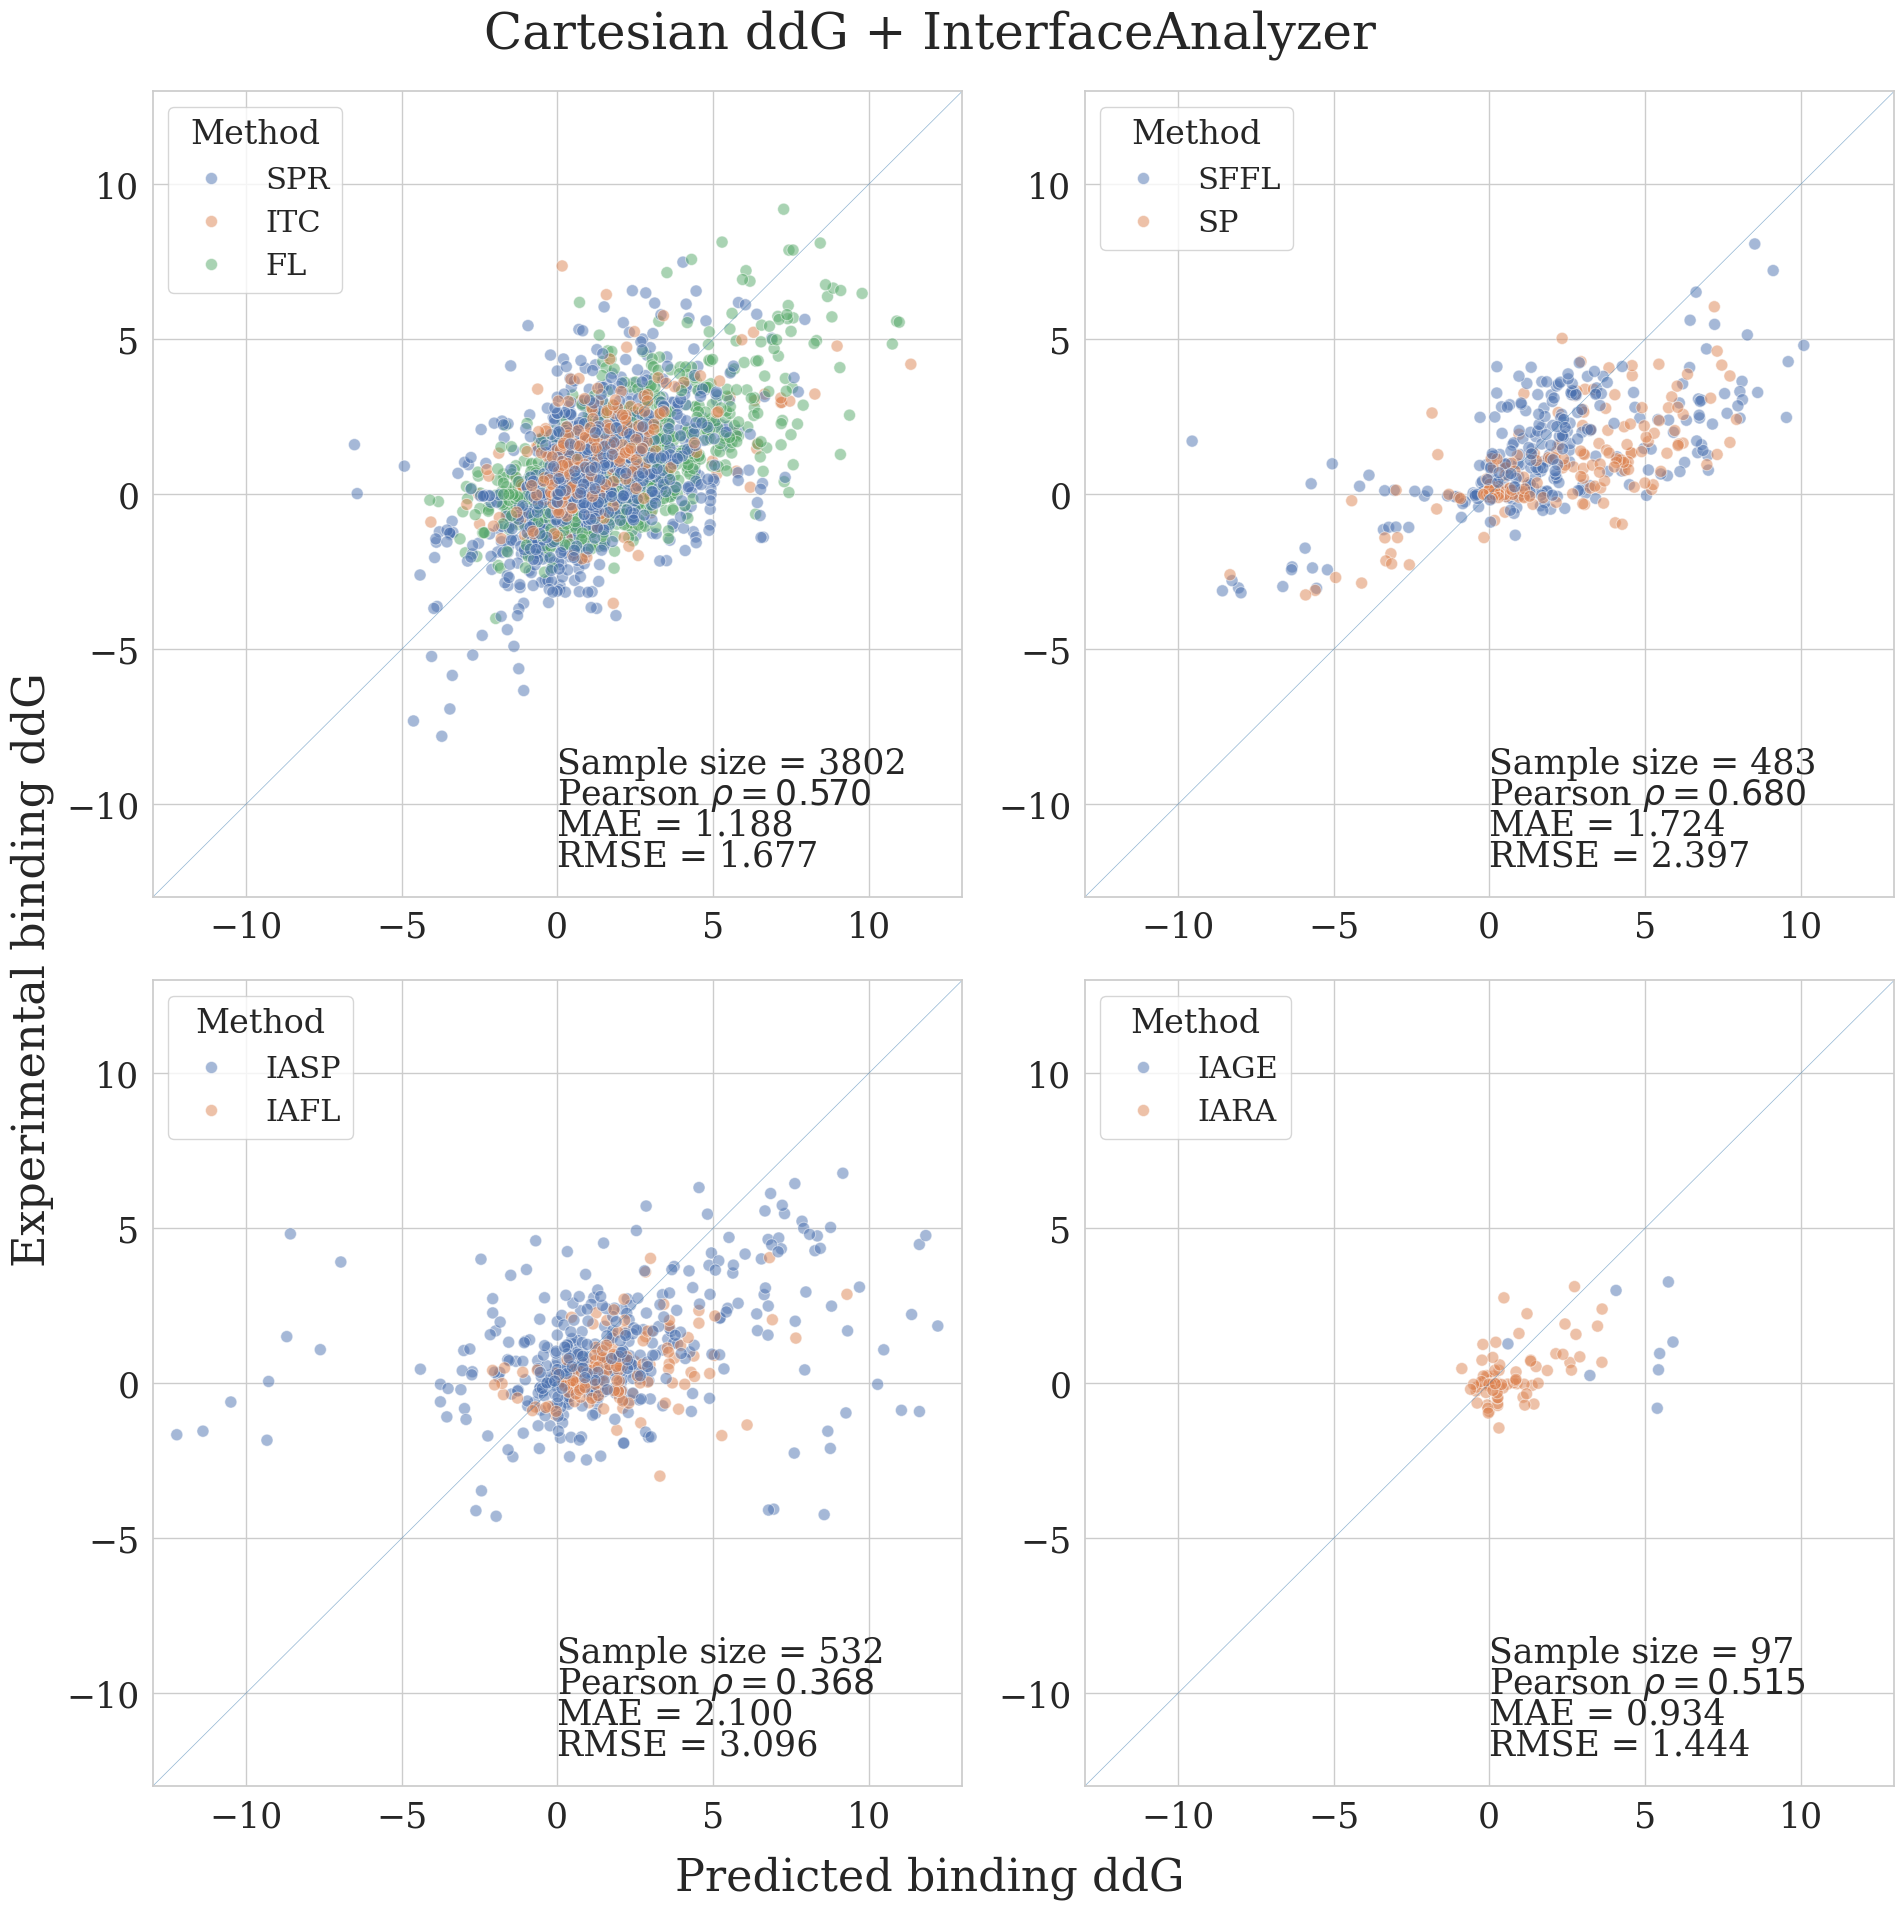

In [45]:
fig, axes = plt.subplots(2, 2, figsize=(20, 20))
plt.setp(axes, xlim=(-13, 13), ylim=(-13, 13))
axes = axes.flatten()

for ax, l in zip(axes, list_of_lists):
    subset = exp_cart_ddG_all_no_nan.loc[exp_cart_ddG_all_no_nan['Method'].isin(l)]
    sns.scatterplot(data=subset, x='ddG_bind',
                       y='mean_ddG_infc',
                       alpha=0.5, s=75,
                       hue='Method',
                       ax=ax)
    # # Label the unfitting data points
    # x = subset['ddG_bind'].values
    # y = subset['mean_ddG_infc'].values
    # names = subset['variant'].values
    # # Distance to the diagonal both on x and y axis
    # #dist = abs(x-y)
    # txt_list=list()
    # for i in range(len(x)):
    #     # dist = np.sqrt((2*(abs(x-y))**2))/2
    #     dist = abs(x-y)
    #     sub_list = list()
    #     if (dist[i] > 4.5)&(len(names[i].split(':'))<=2):
    #         for point_mut in names[i].split(':'):
    #             sub_list.append(point_mut[-1])
    #         name = ','.join(sub_list)
            
    #         ax.text(x[i]+0.01, y[i]+0.01, names[i][-1], fontsize=13)
    #         #txt_list.append(plt.text(x[i]+0.01, y[i]+0.01, name, fontsize=10))
    # #adjust_text(txt_list)
    
    ax.plot([-15, 15], [-15, 15], color='steelblue', ls='-', lw=0.5, alpha=0.6)
    ax.annotate(f'Sample size = {len(subset)}', xy=(0, -9), fontsize = 25)
    r, p = stats.pearsonr(subset['ddG_bind'], subset['mean_ddG_infc'])
    ax.annotate(f'Pearson $\\rho = {r:.3f}$', xy=(0, -10), fontsize = 25)
    error = mae(subset['ddG_bind'], subset['mean_ddG_infc'])
    ax.annotate(f'MAE = {error:.3f}', xy=(0, -11), fontsize = 25)
    rmse = sqrt(mean_squared_error(subset['ddG_bind'], subset['mean_ddG_infc']))
    ax.annotate(f'RMSE = {rmse:.3f}', xy=(0, -12), fontsize = 25)
    ax.set_xlabel("")
    ax.set_ylabel("")
    #ax.set_title(f'N of point mutations = {N}', fontsize = 28)
    sns.move_legend(ax, "upper left")
    
fig.text(0.5, 0.04, 'Predicted binding ddG', ha='center', fontsize=32)  # x label
fig.text(0.04, 0.5, 'Experimental binding ddG', va='center', rotation='vertical', fontsize=32)
fig.suptitle('Cartesian ddG + InterfaceAnalyzer', fontsize=36)
plt.tight_layout(rect=[0.05, 0.05, 1, 1])
plt.savefig('Figures/cart_ddG_IA_method_x4.pdf', format='pdf')

In [48]:
# skempi2_unfilt = pd.read_csv('/groups/sbinlab/panf/SKEMPIv2/skempi_v2.csv', sep=';')
# skempi_unfilt_count = skempi2_unfilt[['#Pdb', 'Method']].groupby('Method').count().reset_index()
# skempi_unfilt_count.rename(columns={"#Pdb": "Percentage"}, inplace=True)
# skempi_unfilt_count['Percentage'] = skempi_unfilt_count['Percentage'] / len(skempi2_unfilt) * 100
# skempi_unfilt_count['Subset'] = 'All' 

In [65]:
#skempi2_unfilt = pd.read_csv('/groups/sbinlab/panf/SKEMPIv2/skempi_v2.csv', sep=';')
skempi2_unfilt = exp_cart_ddG_all_no_nan.copy()
skempi_unfilt_count = skempi2_unfilt[['#Pdb', 'Method']].groupby('Method').count().reset_index()
skempi_unfilt_count.rename(columns={"#Pdb": "Percentage"}, inplace=True)
skempi_unfilt_count['Percentage'] = skempi_unfilt_count['Percentage'] / len(skempi2_unfilt) * 100
skempi_unfilt_count['Subset'] = 'All' 

In [66]:
outliers_meth = outliers.copy()
outliers_meth_count = outliers_meth[['#Pdb', 'Method']].groupby('Method').count().reset_index()
outliers_meth_count.rename(columns={"#Pdb": "Percentage"}, inplace=True)
outliers_meth_count['Percentage'] = outliers_meth_count['Percentage'] / len(outliers) * 100
outliers_meth_count['Subset'] = 'Outliers' 

In [67]:
#barplot_material = pd.concat([skempi_unfilt_count, skempi2_mm_count, skempi2_mm_err_count, outliers_meth_count])
barplot_material = pd.concat([skempi_unfilt_count, outliers_meth_count])

In [180]:
# Block of seaborn style settings
plt.rc('font', size=35) #controls default text size
plt.rc('axes', labelsize=20) #fontsize of the x and y labels
plt.rc('xtick', labelsize=18) #fontsize of the x tick labels
plt.rc('ytick', labelsize=18) #fontsize of the y tick labels
sns.set(style='whitegrid', color_codes=True, font='serif', font_scale=2)

plt.rc('xtick', labelsize=25) #fontsize of the x tick labels
plt.rc('ytick', labelsize=35) #fontsize of the y tick labels

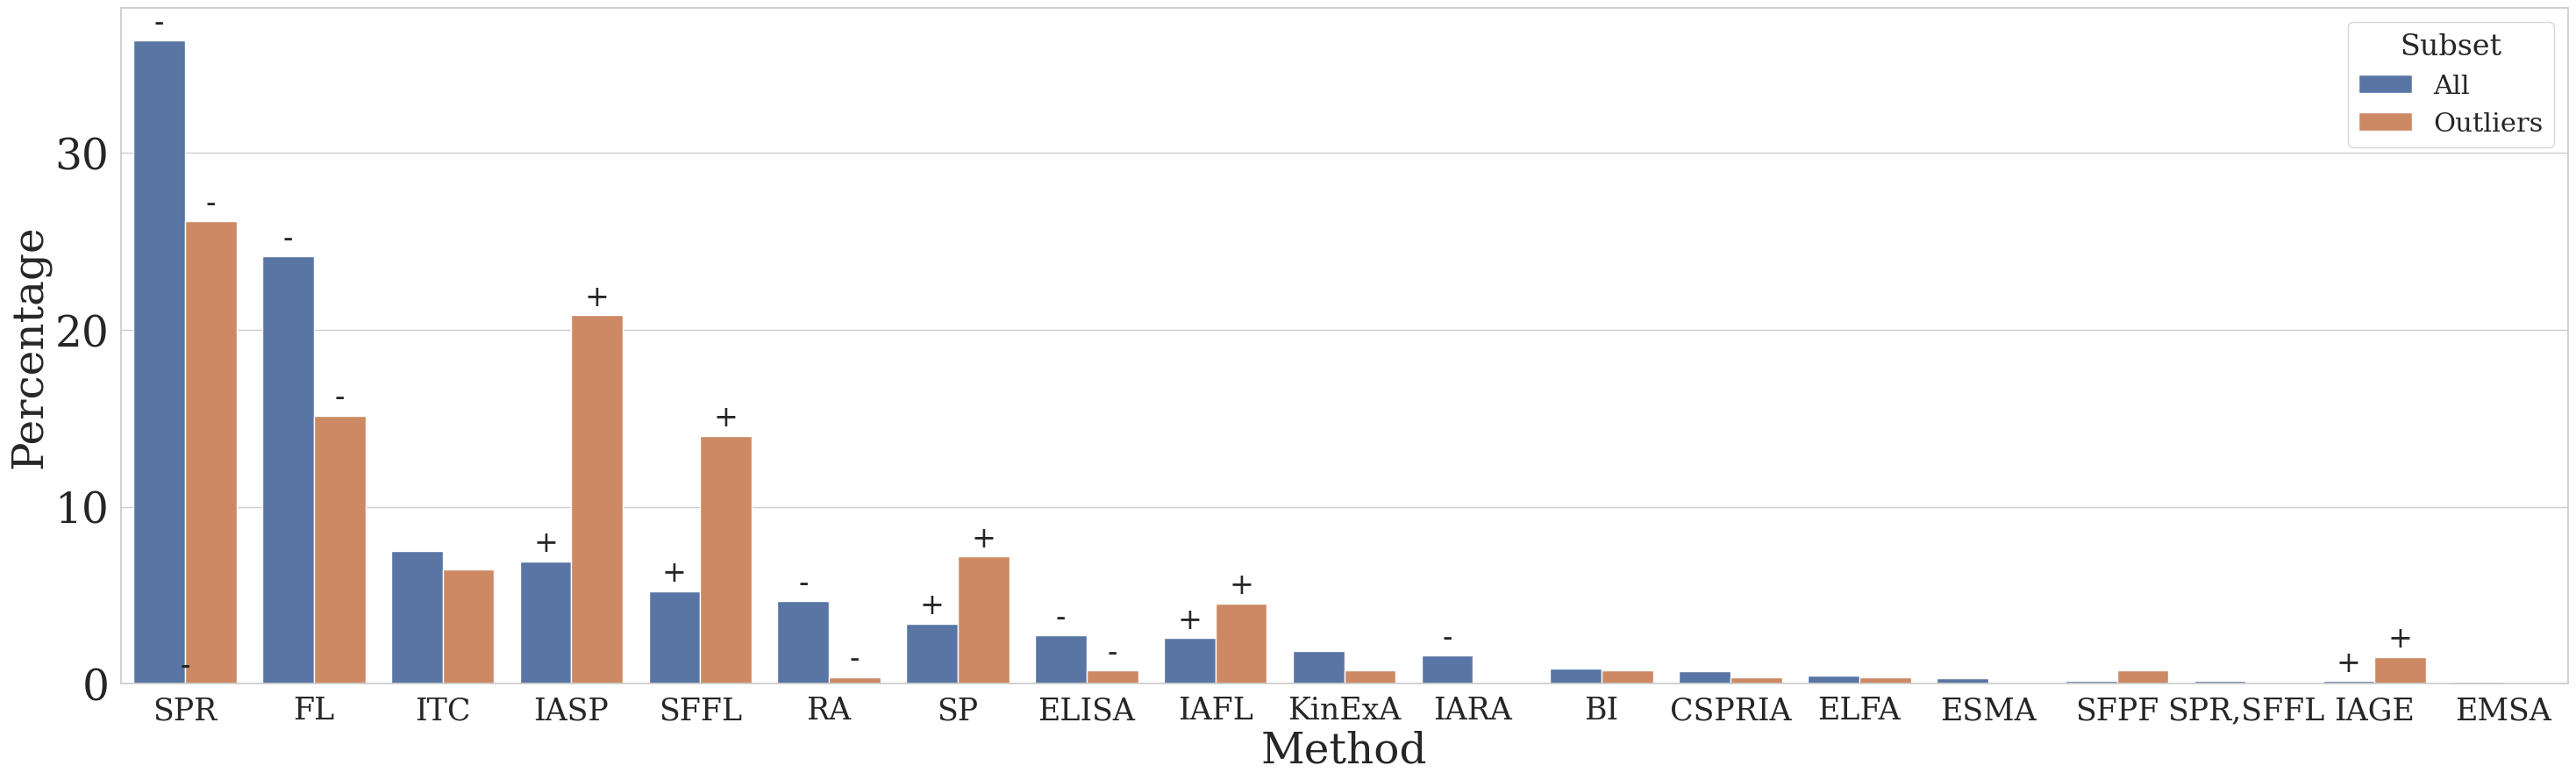

In [181]:
fig, ax = plt.subplots(figsize=(36, 10))
ax = sns.barplot(barplot_material, x="Method", y="Percentage", hue="Subset", order=skempi_unfilt_count.sort_values('Percentage', ascending=False)['Method'].values)

for p in ax.patches:
    h, w, x = p.get_height(), p.get_width(), p.get_x()
    xy = (x + w/2, h + 1)
    
    tick_label = ax.get_xticklabels()[int(np.round(x+w/2))].get_text()
    text = ''
    if tick_label in list_under:
        text = '-'
    if tick_label in list_over:
        text = '+'
        
    ax.annotate(text=text, xy=xy, ha='center', va='center')

plt.xlabel('Method', fontsize=35)
plt.ylabel('Percentage', fontsize=35)
    
plt.savefig('Figures/methods_percentage.pdf', format='pdf')

In [132]:
import pandas as pd
import scipy.stats as stats
import io

df = exp_cart_ddG_all_no_nan.copy()
print("\n--- 2. Defining Groups ---")
df['Group'] = 'Non-Outlier'
df.loc[abs(df['ddG_bind']-df['mean_ddG_infc'])>4, 'Group'] = 'Outlier'

print(f"Total samples: {len(df)}")
print(f"Outlier samples: {len(df[df['Group'] == 'Outlier'])}")
print(f"Non-Outlier samples: {len(df[df['Group'] == 'Non-Outlier'])}")


# --- 2. Create the Contingency Table ---
# This table counts the occurrences of each 'Method' for each 'Group'.
print("\n--- 3. Building the Contingency Table ---")
contingency_table = pd.crosstab(df['Group'], df['Method'])

print("--- Original Contingency Table ---")
print(contingency_table)
print("\n" + "="*50 + "\n")


# --- 2. Loop Through Each Method to Create 2x2 Tables ---
print("--- Performing Post-Hoc Fisher's Exact Tests ---")
results = {}

# Get the list of all methods (columns)
all_methods = contingency_table.columns
list_over = list()
list_under = list()

for method in all_methods:
    # --- a. Create the 2x2 table ---
    
    # Select the current method's column
    current_method_col = contingency_table[method]
    
    # Select all other methods and sum them up row-wise
    other_methods_col = contingency_table.drop(columns=method).sum(axis=1)
    
    # Combine into a new 2x2 DataFrame
    post_hoc_table = pd.concat([current_method_col, other_methods_col], axis=1)
    post_hoc_table.columns = [method, 'All Others']
    
    print(f"--- Testing Method: {method} ---")
    print(post_hoc_table)
    
    # --- b. Run Fisher's Exact Test on the 2x2 table ---
    odds_ratio, p_value = stats.fisher_exact(post_hoc_table)
    
    print(f"P-value: {p_value:.4f}")
    
    # Store the result
    results[method] = p_value
    
    # Check for significance (using a common alpha level)
    if p_value < 0.05:
        print("Result: SIGNIFICANT. This method's proportion is different in the outlier group.")
        all_freq = post_hoc_table['All Others']['Outlier']/(post_hoc_table['All Others'].sum())
        meth_freq = post_hoc_table[method]['Outlier']/(post_hoc_table[method].sum())
        print(f"All other method outlier frequency: {all_freq}")
        print(f"{method} outlier frequency: {meth_freq}")
        if meth_freq>all_freq:
            list_over.append(method)
        else:
            list_under.append(method)
    print("-" * 30)

# --- 3. Display Final Summary ---
print("\n" + "="*50)
print("--- Summary of P-values for Each Method ---")
print("="*50)

# Create a DataFrame for a nice, sorted view
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['p_value'])
results_df['is_significant'] = results_df['p_value'] < 0.05
results_df = results_df.sort_values(by='p_value')

print(results_df)

print("\nConclusion:")
print(f"Methods {list_over}' are disproportionately overrepresented in your outlier group.")
print(f"Methods {list_under}' are disproportionately underrepresented in your outlier group.")




--- 2. Defining Groups ---
Total samples: 5587
Outlier samples: 264
Non-Outlier samples: 5323

--- 3. Building the Contingency Table ---
--- Original Contingency Table ---
Method       BI  CSPRIA  ELFA  ELISA  EMSA  ESMA    FL  IAFL  IAGE  IARA  \
Group                                                                      
Non-Outlier  47      39    24    150     6    17  1310   133     4    89   
Outlier       2       1     1      2     0     0    40    12     4     0   

Method       IASP  ITC  KinExA   RA  SFFL  SFPF   SP   SPR  SPR,SFFL  
Group                                                                 
Non-Outlier   332  403     101  260   256     8  171  1963        10  
Outlier        55   17       2    1    37     2   19    69         0  


--- Performing Post-Hoc Fisher's Exact Tests ---
--- Testing Method: BI ---
             BI  All Others
Group                      
Non-Outlier  47        5276
Outlier       2         262
P-value: 1.0000
------------------------------
-

In [109]:
print(list_over)
print(list_under)

['IAFL', 'IAGE', 'IASP', 'SFFL', 'SP']
['ELISA', 'FL', 'IARA', 'RA', 'SPR']


## Bits and pieces

In [ ]:
plt.rc('font', size=23) #controls default text size
plt.rc('axes', labelsize=20) #fontsize of the x and y labels
plt.rc('xtick', labelsize=18) #fontsize of the x tick labels
plt.rc('ytick', labelsize=18) #fontsize of the y tick labels
sns.set(style='whitegrid', color_codes=True, font='serif', font_scale=2)

In [100]:
S2536_sub[S2536_sub['ddG_bind'].isna()]

,Entry,PDB,Interacting Chains,Mutation(s),Mutation(s)_in_raw_pdb,Temperature,Reference,DDGb,DDGb_SK1,cRSA,...,small-to-large,type_of_change_infc,type_of_change_aa,N_mut,multiple_measurements,no_proper_value,Method,LChains,RChains,Chains
99,"114,188",1BRS,A:D,DD39A,DD39A,298.00,"7739054,Water-mediated_interaction_at_a_protei...",6.790,6.79,0.968,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"439,451",2WPT,A:B,SB67A,SB74A,298.00,18471830,-0.134,-0.134,4.186,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
481,"845,1262",1JTG,A:B,EA79K,EA104K,298.00,"9891008,21294157",3.239,4.233,6.048,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
496,"947,5776",1JTG,A:B,EA85A,EA110A,297.00,"17070843,24947275",1.378,4.06,7.146,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
825,"2080,3057",1DAN,HL:TU,VU113A,VU207A,298.00,"7947809,7654692",0.690,0.69,2.422,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1034,"2434,3242",1CHO,EFG:I,TI14E,TI17E,294.00,"11171964,Stephen_Ming-teh_Lu_PhD_Thesis_Purdue...",5.582,5.582,16.190,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1772,"3625,3634",1BD2,ABC:DE,YC5A,YC5A,298.00,23736024,3.340,XXX,1.514,...,NaN,NaN,NaN,1,False,no binding MUT,SPR,NaN,NaN,NaN
2052,"4728,4740",4I77,HL:Z,YH101A,YH98A,304.00,23357170,1.654,XXX,8.374,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2059,"4735,4747",4I77,HL:Z,YL32A,YL28A,304.00,23357170,0.815,XXX,35.450,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2102,"5327,5364,5441",3S9D,A:B,RA26A,RA33A,298.00,"10556041,10984492,21854986",5.123,XXX,10.682,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [114]:
skempi2_raw.loc[(skempi2_raw['#Pdb'].str[0:4]=='1BRS')&(skempi2_raw['Mutation(s)_PDB']=='DD39A')].values

array([['1BRS_A_D', 'DD39A', 'DD39A', 'COR', nan,
        '1BRS_A_D,1B2U_A_D,1B2S_A_D,1B3S_A_D,1X1W_A_D,1X1X_A_D',
        '4.06E-09', 4.06e-09, '1E-14', 1e-14, '7739054', 'Barnase',
        'Barstar', '298', 190000000.0, 190000000.0, 370000000.0,
        370000000.0, '9E-01', 0.9, '3.73E-06', 3.73e-06, -7.4, -19.3,
        13.1, -1.01,
        'Thermodynamic data from 9126847. ITC dG(mut) is -11.1 kcal/mol,,',
        'ITC', 1],
       ['1BRS_A_D', 'DD39A', 'DD39A', 'COR', nan,
        '1BRS_A_D,1B2U_A_D,1B2S_A_D,1B3S_A_D,1X1W_A_D,1X1X_A_D',
        '2.96E-06', 2.96e-06, '1.32E-10', 1.32e-10,
        'Water-mediated interaction at a protein-protein interface, Chemical Physics, Volume 307, Issues 2-3, 2004',
        'Barnase', 'Barstar', '298', 155000.0, 155000.0, 874000.0,
        874000.0, '4.57E-01', 0.457, '1.15E-04', 0.000115, nan, nan, nan,
        nan, nan, 'SPR', 1]], dtype=object)

In [ ]:
residue_asa_3 = {
    'GLY': 47.155,
    'ALA': 61.063,
    'SER': 69.073,
    'CYS': 78.62,
    'PRO': 81.03,
    'THR': 82.92,
    'ASP': 86.142,
    'VAL': 90.264,
    'ASN': 90.541,
    'GLU': 102.57,
    'ILE': 105.307,
    'LEU': 105.842,
    'GLN': 106.534,
    'HIS': 110.864,
    'MET': 112.01,
    'LYS': 120.502,
    'PHE': 124.714,
    'TYR': 130.885,
    'ARG': 138.595,
    'TRP': 148.915
}

residue_asa_1 = {
    'G': 47.155,
    'A': 61.063,
    'S': 69.073,
    'C': 78.62,
    'P': 81.03,
    'T': 82.92,
    'D': 86.142,
    'V': 90.264,
    'N': 90.541,
    'E': 102.57,
    'I': 105.307,
    'L': 105.842,
    'Q': 106.534,
    'H': 110.864,
    'M': 112.01,
    'K': 120.502,
    'F': 124.714,
    'Y': 130.885,
    'R': 138.595,
    'W': 148.915
}

In [ ]:
fig, axes = plt.subplots(1,1, figsize = (15,15))
plt.setp(axes, xlim=(-13, 15.2), ylim=(-13, 15.2))
# Create the scatter plot
plot = sns.scatterplot(data=exp_cart_ddG_all_no_nan, x='mean_ddG',
                       y='mean_ddG_infc',
                       alpha=0.5, s=65, hue='N_mut')

plt.xlabel('Without IA', fontsize=25)
plt.ylabel('With IA', fontsize=25)
plt.title('Cartesian ddG vs Cartesian ddG + InterfaceAnalyzer', fontsize=25)

# Label the unfitting data points
x = exp_cart_ddG_all_no_nan['mean_ddG'].values
y = exp_cart_ddG_all_no_nan['mean_ddG_infc'].values
names = exp_cart_ddG_all_no_nan['variant'].values
txt_list=list()
for i in range(len(x)):
    # dist = np.sqrt((2*(abs(x-y))**2))/2
    dist = abs(x-y)
    sub_list = list()
    if (dist[i] > 4)&(len(names[i].split(':'))<=2):
        for point_mut in names[i].split(':'):
            sub_list.append(point_mut[-1])
        name = ','.join(sub_list)
        
        #plot.text(x[i]+0.01, y[i]+0.01, names[i][-1], fontsize=13)
        txt_list.append(plot.text(x[i]+0.01, y[i]+0.01, name, fontsize=10))
            
adjust_text(txt_list)

min_val = -15 - 1.5
max_val = 15 + 1.5
axes.plot([min_val, max_val], [min_val, max_val], color='gray', ls='--', lw=1)

r, p = stats.pearsonr(exp_cart_ddG_all_no_nan['mean_ddG'],
                      exp_cart_ddG_all_no_nan['mean_ddG_infc'])
axes.annotate(f'all muts $\\rho = {r:.3f}$', xy=(5, -10), fontsize = 25)

r, p = stats.pearsonr(exp_cart_ddG_all_no_nan.loc[exp_cart_ddG_all_no_nan['N_mut']=='1']['mean_ddG'],
                      exp_cart_ddG_all_no_nan.loc[exp_cart_ddG_all_no_nan['N_mut']=='1']['mean_ddG_infc'])
axes.annotate(f'single mut $\\rho = {r:.3f}$', xy=(5, -12), fontsize = 25)

#plt.savefig('Figures/cart_ddG_IA_vs_reg.pdf', format='pdf')

In [ ]:


fig, axes = plt.subplots(1,1, figsize = (12,12))
plt.setp(axes, xlim=(-13, 13), ylim=(-13, 13))
# Create the scatter plot

df = exp_cart_ddG_all_no_nan.loc[exp_cart_ddG_all_no_nan['no_proper_value']!='Regular']

plot = sns.scatterplot(data=df, x='ddG_bind',
                       y='mean_ddG_infc',
                       alpha=0.5, s=65, hue='no_proper_value')

plt.xlabel('Experimental binding ddG', fontsize=25)
plt.ylabel('Predicted binding ddG', fontsize=25)
plt.title('Cartesian ddG + InterfaceAnalyzer', fontsize=25)

min_val = -15 - 1.5
max_val = 15 + 1.5
axes.plot([min_val, max_val], [min_val, max_val], color='gray', ls='--', lw=1)

r, p = stats.pearsonr(df['ddG_bind'],
                      df['mean_ddG_infc'])
axes.annotate(f'all muts $\\rho = {r:.3f}$', xy=(0, -9), fontsize = 25)

r, p = stats.pearsonr(df.loc[df['N_mut']=='1']['ddG_bind'],
                      df.loc[df['N_mut']=='1']['mean_ddG_infc'])
axes.annotate(f'single mut $\\rho = {r:.3f}$', xy=(0, -10.5), fontsize = 25)

sns.move_legend(axes, "upper left")

#plt.savefig('Figures/cart_ddG_IA_no_outliers.pdf', format='pdf')

In [ ]:
skempi2_mm = pd.read_csv('/groups/sbinlab/panf/SKEMPIv2_benchmark/skempi2_multi_measurements.csv')
skempi2_mm_count = skempi2_mm[['#Pdb', 'Method']].groupby('Method').count().reset_index()
skempi2_mm_count.rename(columns={"#Pdb": "Percentage"}, inplace=True)
skempi2_mm_count['Percentage'] = skempi2_mm_count['Percentage'] / len(skempi2_mm) * 100
skempi2_mm_count['Subset'] = 'Multiple measuremnts' 

skempi2_mm_err = skempi2_mm.loc[skempi2_mm['ddG_bind_std']>1]
skempi2_mm_err_count = skempi2_mm_err[['#Pdb', 'Method']].groupby('Method').count().reset_index()
skempi2_mm_err_count.rename(columns={"#Pdb": "Percentage"}, inplace=True)
skempi2_mm_err_count['Percentage'] = skempi2_mm_err_count['Percentage'] / len(skempi2_mm_err) * 100
skempi2_mm_err_count['Subset'] = 'Error'

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

df = exp_cart_ddG_all_no_nan.copy()

# --- 1. Define Groups based on Prediction Error ---
# Here we use your exact logic to define the 'Outlier' group.
print("\n--- 2. Defining Groups ---")
df['Group'] = 'Non-Outlier'
df.loc[abs(df['ddG_bind']-df['mean_ddG_infc'])>4, 'Group'] = 'Outlier'

print(f"Total samples: {len(df)}")
print(f"Outlier samples: {len(df[df['Group'] == 'Outlier'])}")
print(f"Non-Outlier samples: {len(df[df['Group'] == 'Non-Outlier'])}")


# --- 2. Create the Contingency Table ---
# This table counts the occurrences of each 'Method' for each 'Group'.
print("\n--- 3. Building the Contingency Table ---")
contingency_table = pd.crosstab(df['Group'], df['Method'])
print(contingency_table)


# --- 3. Perform the Chi-Squared Test ---
print("\n--- 4. Performing Chi-Squared Test ---")
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"\nP-value: {p_value:.10f}")
if p_value < 0.05:
    print("Result: The p-value is significant. The distribution of 'Method' is different for the outlier group.")
else:
    print("Result: The p-value is not significant. The 'Method' distribution is similar across groups.")


# --- 4. Find Overrepresented Categories (Post-Hoc Analysis) ---
# If the p-value was significant, we find out which categories were responsible.
if p_value < 0.05:
    print("\n--- 5. Analyzing Standardized Residuals ---")
    # Standardized Residual = (Observed - Expected) / sqrt(Expected)
    residuals = (contingency_table - expected) / np.sqrt(expected)
    
    # Extracting the residuals for the 'Outlier' group for easier analysis
    outlier_residuals = residuals.loc['Outlier']
    
    # A residual > 1.96 is a common threshold for statistical significance
    overrepresented = outlier_residuals[outlier_residuals > 1.96]

    print("\nInterpreting the Residuals for the 'Outlier' group:")
    print("A large positive residual (> 1.96) suggests significant OVERREPRESENTATION.")
    
    if not overrepresented.empty:
        print("\nSignificantly OVERREPRESENTED categories in the Outlier group:")
        print(overrepresented.round(2))
    else:
        print("\nNo categories were found to be significantly overrepresented in the Outlier group.")